In [741]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Загрузить датасет с помощью библиотеки pandas.

In [743]:
df = pd.read_csv('credit_risk2.csv')

## 2. Провести предварительную обработку данных.

In [745]:
df.head(3)

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22.0,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21.0,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25.0,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3


Данные содержат информацию о кредитных заявках:
- возраст (Age)
- доход (Income)
- статус домовладения (Собственный, Ипотека, Аренда) (Home)
- стаж работы в годах (Emp_lenght)
- цель кредита (Intent)
- сумма кредита по заявке (Amount)
- процентная ставка (Rate)
- статус одобрения кредита (Status)
- сумма кредита в процентах от дохода (Percent_income)
- не допустил ли заявитель ранее дефолта по кредиту (да, нет) (Default)
- длина кредитной истории заявителя (Cred_lenght)

Для просмотра информации о датасете, будут применены методы info() и describe()

In [748]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              652 non-null    int64  
 1   Age             652 non-null    float64
 2   Income          652 non-null    int64  
 3   Home            652 non-null    object 
 4   Emp_length      643 non-null    float64
 5   Intent          652 non-null    object 
 6   Amount          652 non-null    int64  
 7   Rate            586 non-null    float64
 8   Status          652 non-null    int64  
 9   Percent_income  652 non-null    float64
 10  Default         652 non-null    object 
 11  Cred_length     652 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 61.3+ KB


In [749]:
df.describe()

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
count,652.000000,652.000000,652.000000,643.000000,652.000000,586.000000,652.000000,652.000000,652.000000
mean,325.495399,24.285276,90008.855828,4.601866,18800.996933,12.289471,0.601227,0.279831,3.012270
std,188.352535,7.841061,69530.312525,7.281616,9152.896250,3.272772,0.490022,0.150231,0.808843
min,0.000000,21.000000,9600.000000,0.000000,1000.000000,5.420000,0.000000,0.010000,2.000000
25%,162.750000,23.000000,44000.000000,2.000000,10000.000000,10.250000,0.000000,0.160000,2.000000
50%,325.500000,24.000000,69998.000000,4.000000,21850.000000,12.180000,1.000000,0.280000,3.000000
75%,488.250000,25.000000,128499.000000,7.000000,25000.000000,14.720000,1.000000,0.380000,4.000000
max,649.000000,144.000000,500000.000000,123.000000,35000.000000,21.210000,1.000000,0.830000,4.000000


Сначала будут предобработаны числовые признаки. Первый числовой признак - «Age». Из метода info видно, что тип данных отличается от остальных, поэтому было принято решение преобразовать тип данных к int64.

In [751]:
df.Age = df.Age.astype('int64')

По методу describe заметны выбросы в признаке «Age», поэтому была произведена сортировка с целью посмотреть на аномальные данные.

In [753]:
df.Age.sort_values()

325     21
30      21
567     21
107     21
35      21
      ... 
34      26
392     26
575    123
183    144
81     144
Name: Age, Length: 652, dtype: int64

Возраст человека не может быть больше 100, выбросы были удалены.

In [755]:
df = df[df['Age'] < 100]

Аналогично, в признаке «Emp_length» были замечены выбросы.

In [757]:
df.Emp_length.dropna().sort_values()

62       0.0
229      0.0
70       0.0
571      0.0
620      0.0
       ...  
577     10.0
553     11.0
141     11.0
210    123.0
0      123.0
Name: Emp_length, Length: 640, dtype: float64

Стаж работы не может быть больше 100 лет, выбросы были удалены.

In [759]:
df['Emp_length'] = df[df['Emp_length'] < 100]['Emp_length']

Также в признаке «Emp_length» есть пропуски (9 штук). В сравнении с размером датасета, количество пропусков незначительно, можно от них избавиться. 

In [761]:
df.dropna(subset='Emp_length', inplace = True)

В признаке «Rate» замечены пропуски. Для того, чтобы принять решение о том, что делать с ними, необходимо изучить характеристики данного столбца.

In [763]:
display(df.Rate.describe(), df.Rate.mode())

count    573.000000
mean      12.329459
std        3.258778
min        5.790000
25%       10.250000
50%       12.180000
75%       14.740000
max       21.210000
Name: Rate, dtype: float64

0    10.99
Name: Rate, dtype: float64

Медиана примерно равна среднему, а также близка к моде. Можно заменить пропуски на медианное значение, так как она примерно соответствует всем характеристикам числового столбца.

In [765]:
df.Rate = df.Rate.fillna(df.Rate.median())

Числовые признаки обработаны, далее будут обработаны категориальные признаки. Первой колонкой будет признак «Home».

In [767]:
df.Home.value_counts()

Home
RENT        411
MORTGAGE    128
OWN          96
OTHER         2
RENET         1
Name: count, dtype: int64

Замечены неявные дубликаты в виде названий с ошибками. Они будут заменены на правильные названия.

In [769]:
df.Home = df.Home.replace({'RENET' : 'RENT'})

Далее, будет обработан признак «Intent».

In [771]:
df.Intent.value_counts()

Intent
EDUCATION            140
VENTURE              114
PERSONAL             108
MEDICAL              107
DEBTCONSOLIDATION    102
HOMEIMPROVEMENT       67
Name: count, dtype: int64

В признаке «Intent» со значениями все нормально, остался последний признак - «Default».

In [773]:
df.Default.value_counts()

Default
N     487
Y     148
No      3
Name: count, dtype: int64

Замечены неявные дубликаты, они будут заменены на корректные значения.

In [775]:
df.Default = df.Default.replace({'No': 'N'})

Числовые и категориальные признаки обработаны, теперь необходимо проверить датасет на наличие явных дубликатов.

In [777]:
df[df.duplicated()]

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
650,649,23,58800,RENT,7.0,DEBTCONSOLIDATION,20000,7.66,1,0.34,N,3
651,649,23,58800,RENT,7.0,DEBTCONSOLIDATION,20000,7.66,1,0.34,N,3


В результате применения метода duplicated, были найдены два явных дубликата, от которых необходимо избавиться.

In [779]:
df.drop_duplicates(inplace=True)
df[df.duplicated()]

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length


Данные предобработаны, можно переходить к выполнению заданий.

## 3. Построить точечную диаграмму (матрицу диаграмм рассеяния). Выполнить анализ полученной диаграммы, отвечая на вопрос показывает ли она в среднем определенную зависимость между переменными. Изучить параметры и описать взаимосвязи. Если параметров слишком много – может потребоваться создать несколько графиков.

Для того чтобы обнаружить взаимосвязи между данными могут применяться диаграммы рассеяния – особый тип графика, который также называется scatter . На таком графике можно увидеть связь между двумя величинами или её отсутствие, а также аномальные точки.

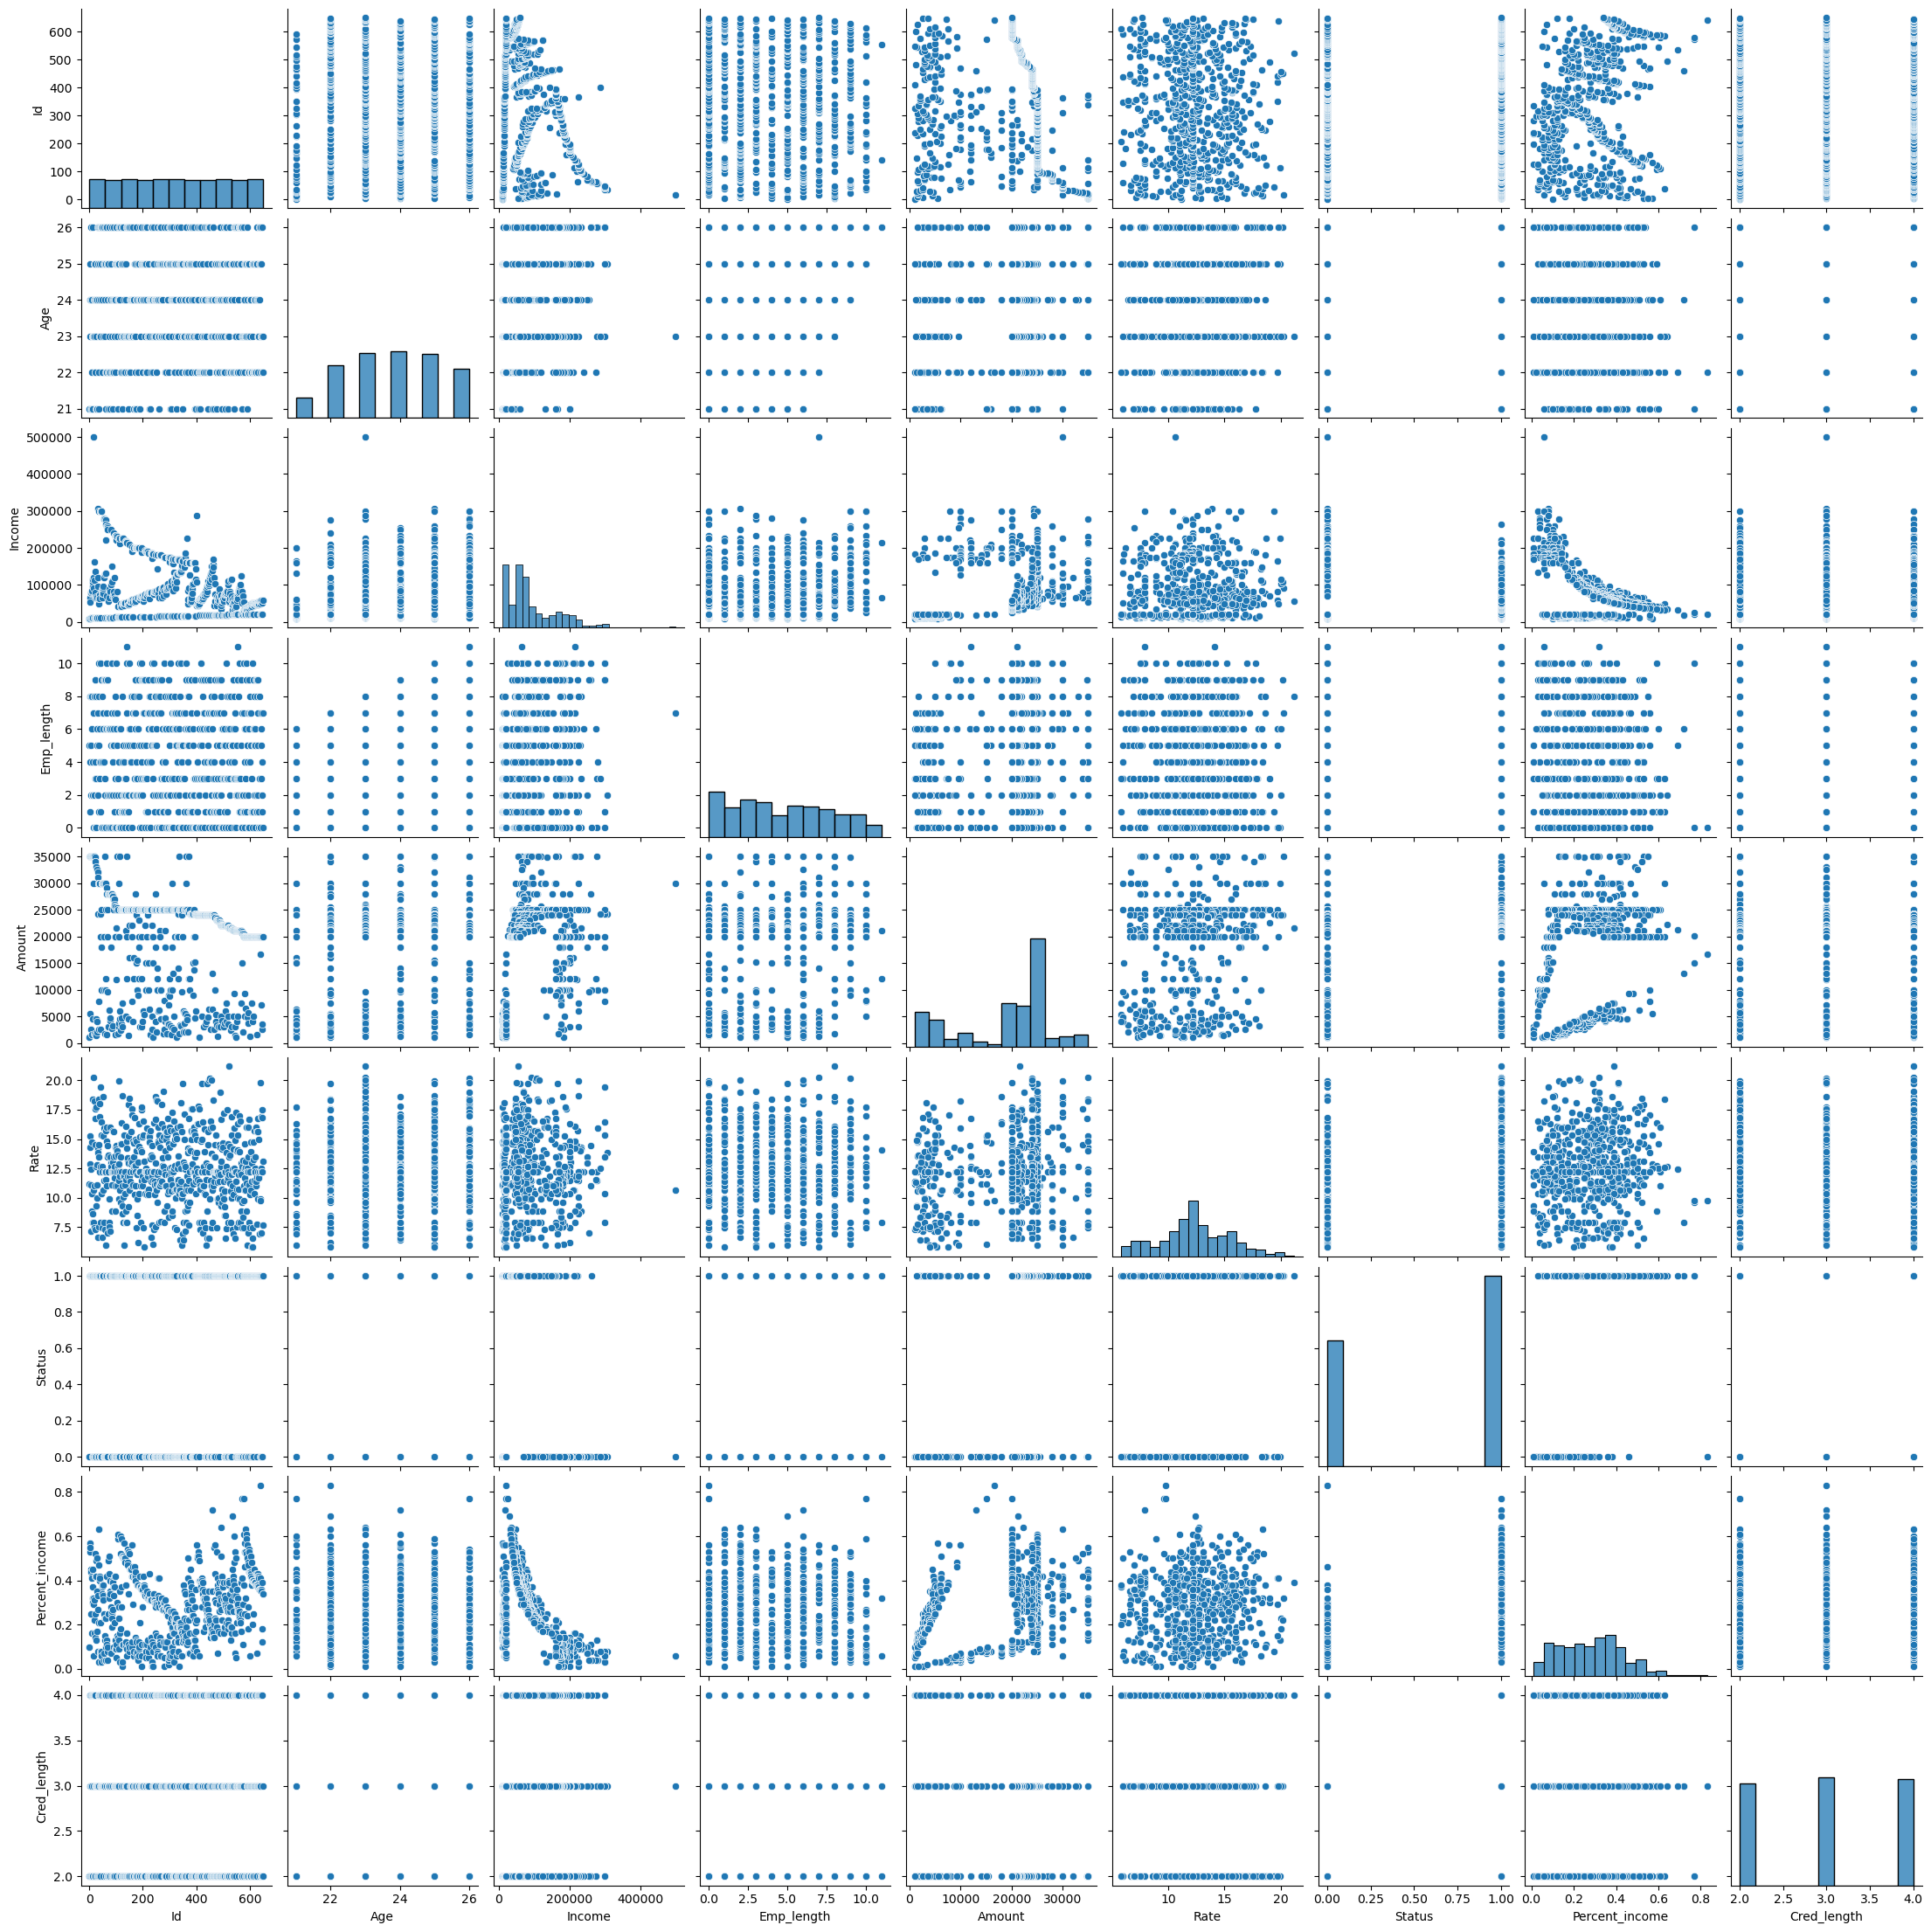

In [783]:
sns.pairplot(df.select_dtypes(exclude = 'object'))
plt.show()

Была построена матрица диаграмм рассеяния со всеми числовыми параметрами, по которой видно, что некоторые признаки являются дискретными, поэтому матрицу можно упростить.

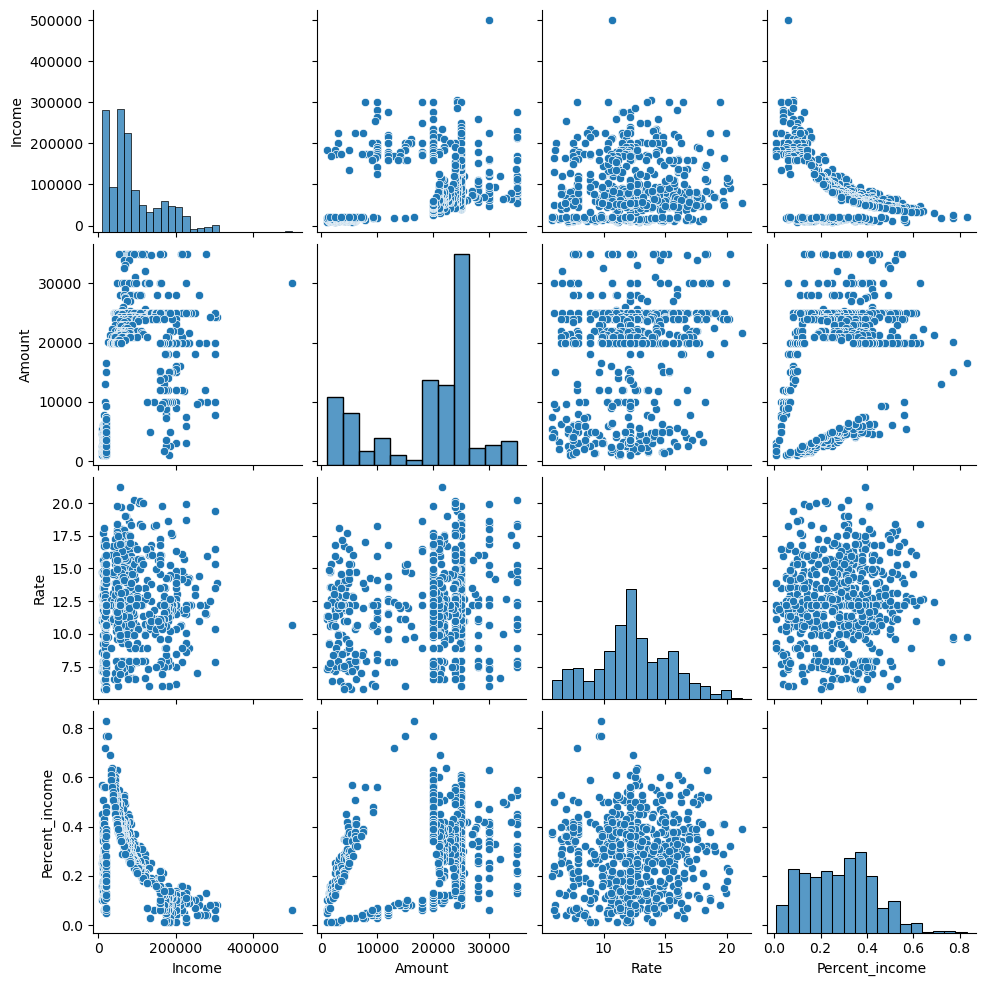

In [785]:
sns.pairplot(df.select_dtypes(exclude = 'object').drop(columns = ['Id','Age', 'Emp_length', 'Status', 'Cred_length']))
plt.show()

В результате построения диаграмм рассеяния, можно сделать следующие предположения о взаимосвязи между величинами:
- На диаграмме Income - Percent_income наблюдается зависимость, возможно, отрицательная криволинейная;
- На диаграмме Amount - Percent_income наблюдается линейная закономерность (две линии) до значений, равных 20000;
- Распределение значения признака «Rate» напоминает нормальное.

Между остальными числовыми признаками, взаимосвязи не замечено.

## 4. Исследовать взаимосвязь между переменными с помощью оценки коэффициента корреляции и ковариации. Выполнить интерпретацию результатов корреляции и ковариации, отвечая на вопросы о наличии (отсутствии) линейной взаимосвязи между переменными.

In [788]:
corr_matrix = df.select_dtypes(exclude='object').corr()
corr_matrix

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
Id,1.000000,-0.031909,-0.339677,-0.034922,-0.143130,-0.046034,0.095757,0.187107,-0.006795
Age,-0.031909,1.000000,0.311280,0.180417,0.182071,0.024252,-0.168104,-0.160407,0.002493
Income,-0.339677,0.311280,1.000000,0.172775,0.289995,0.043607,-0.586554,-0.627381,0.004333
Emp_length,-0.034922,0.180417,0.172775,1.000000,0.166353,-0.036292,-0.057312,-0.060646,-0.088483
Amount,-0.143130,0.182071,0.289995,0.166353,1.000000,0.185898,0.081408,0.334954,-0.017462
Rate,-0.046034,0.024252,0.043607,-0.036292,0.185898,1.000000,0.187898,0.060408,-0.045194
Status,0.095757,-0.168104,-0.586554,-0.057312,0.081408,0.187898,1.000000,0.672570,-0.041247
Percent_income,0.187107,-0.160407,-0.627381,-0.060646,0.334954,0.060408,0.672570,1.000000,-0.031989
Cred_length,-0.006795,0.002493,0.004333,-0.088483,-0.017462,-0.045194,-0.041247,-0.031989,1.000000


Корреляция может принимать значения от -1 до 1, чем ближе корреляция к крайним значениям, тем линейная взаимосвязь сильнее выражена. Если значение корреляции отрицательно, значит при увеличении значения одной величины, значение другой уменьшается. Если положительно, значит при увеличении значения одного признака, увеличивается и значение другого. Если значение корреляции близко к 0, значит взаимосвязь отсутствует.
Интерпретация полученного результата матрицы корреляций:
- С признаком ID отрицательное коррелирует показатель дохода, связь слабая;
- Наблюдается положительная слабая корреляция признака Age с Income;
- Наблюдается заметная отрицательная корреляция признака Income с Status и Percent_income;
- Наблюдается слабая положительная связь между признаками Amount c Income и Percent_income.

У остальных признаков взаимосвязь отсутствует.

Далее, будет построена матрица ковариаций.

In [791]:
cov_matrix = df.select_dtypes(exclude='object').cov()
cov_matrix

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
Id,3.531183e+04,-8.910689,-4.422707e+06,-19.996422,-2.435301e+05,-26.662093,8.814012,5.277967,-1.037030
Age,-8.910689e+00,2.208416,3.205191e+04,0.816974,2.449878e+03,0.111082,-0.122367,-0.035783,0.003008
Income,-4.422707e+06,32051.907867,4.800924e+09,36478.068279,1.819348e+08,9312.633988,-19907.395214,-6525.434130,243.844042
Emp_length,-1.999642e+01,0.816974,3.647807e+04,9.284948,4.589679e+03,-0.340844,-0.085542,-0.027740,-0.218979
Amount,-2.435301e+05,2449.877804,1.819348e+08,4589.679221,8.198348e+07,5187.901501,361.057668,455.264505,-128.414426
Rate,-2.666209e+01,0.111082,9.312634e+03,-0.340844,5.187902e+03,9.499647,0.283675,0.027949,-0.113134
Status,8.814012e+00,-0.122367,-1.990740e+04,-0.085542,3.610577e+02,0.283675,0.239932,0.049454,-0.016409
Percent_income,5.277967e+00,-0.035783,-6.525434e+03,-0.027740,4.552645e+02,0.027949,0.049454,0.022534,-0.003900
Cred_length,-1.037030e+00,0.003008,2.438440e+02,-0.218979,-1.284144e+02,-0.113134,-0.016409,-0.003900,0.659642


Ковариация характеризует степень зависимости двух переменных. Чем она больше отличается от нуля, тем больше зависимость. Если большие значения одной переменной в основном соответствуют большим значениям другой переменной, и то же самое верно для меньших значений (то есть переменные имеют тенденцию одинаковой направленности) — ковариация положительна. При отрицательной ковариации большие значения одной переменной в основном соответствуют меньшим значениям другой и наоборот (то есть переменные имеют тенденцию противоположной направленности).
Интерпретация полученных результатов:
- Коэффициенты ковариации, сильно отличные от нуля, наблюдаются у тех же сочетаний признаков, что и в матрице корреляций, значит признаки действительно зависимы друг от друга.

## 5. Построить heatmap (тепловую карту корреляции).

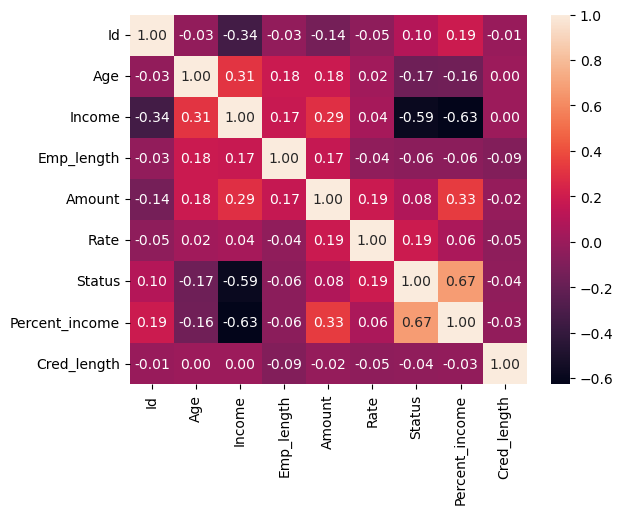

In [794]:
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.show()

Полученная тепловая карта матрицы корреляций хорошо отображает полученные значения. Чем цвет ближе к черному, или белому, тем сильнее зависимость между переменными. В параметрах тепловой карты указано наличие аннотаций и форматирование значений до 2 знаков после запятой.

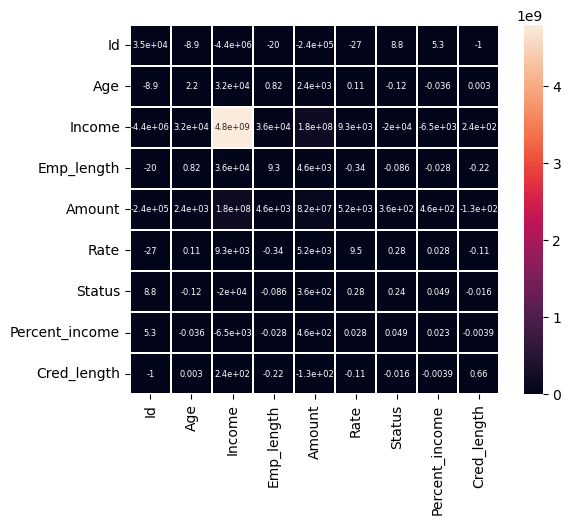

In [796]:
sns.heatmap(cov_matrix, annot=True, annot_kws={'size':6}, square=True, linewidth=0.1)
plt.show()

Так как значения коэффициентов ковариаций сильно различаются по масштабам, то полученная матрица плохо отображает полученные результаты. 
Касательно параметров тепловой карты, здесь указано наличие аннотаций (самих значений коэффициентов), размер этих аннотаций, и разделение ячеек на квадраты.

## 6. Постройте графики по заданию в варианте.

### Задание 1. Использовать seaborn. По группировке - цель кредита (intent) по количеству статуса домовладения (home) построить диаграмму.

In [800]:
task1 = pd.DataFrame(df.groupby('Intent')['Home'].value_counts())

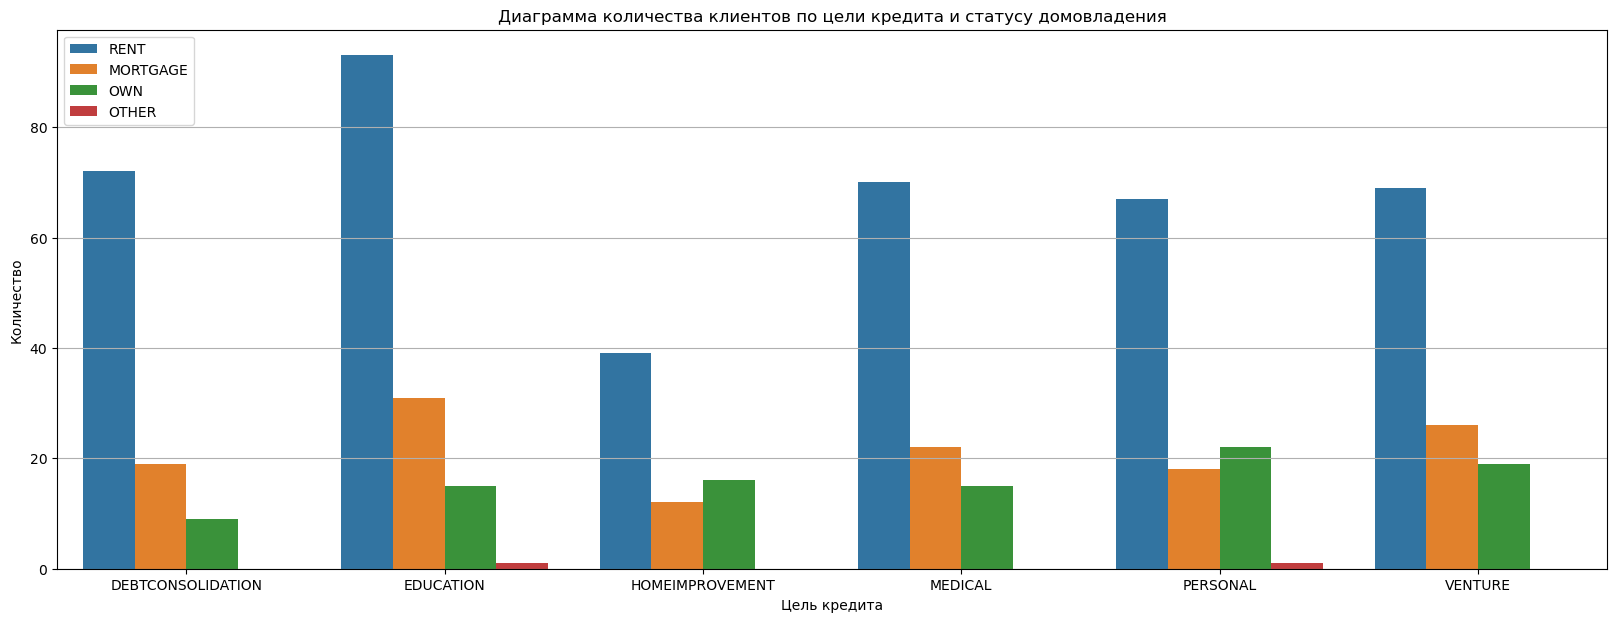

In [801]:
f, ax = plt.subplots(figsize= (20,7))
sns.barplot(task1, x = 'Intent', y = 'count', hue = 'Home', ax=ax)
plt.grid(axis = 'y')
plt.xlabel('Цель кредита')
plt.ylabel('Количество')
plt.legend(loc = 'upper left')
ax.set_title('Диаграмма количества клиентов по цели кредита и статусу домовладения')
plt.show()

В результате построения диаграммы, можно увидеть, что у всех целей кредитов преобладает тип домовладения - собственность в аренде.

### Задание 2. Использовать pandas и plot. Отфильтровать возраст - до 100 По сводной таблице (pivot_table) - отобразить средний доход (income) по возрасту. Оставить только маркеры в виде ★ коричневого цвета размером 16.

In [804]:
df['Age'] = df[df['Age'] < 100]['Age']

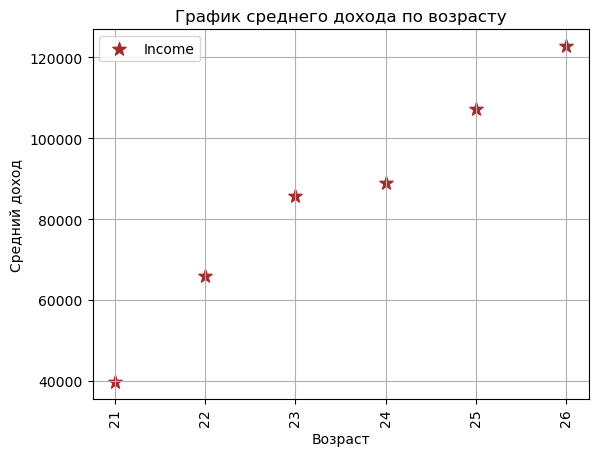

In [805]:
task2 = df.pivot_table(index = 'Age', values = 'Income', aggfunc='mean').reset_index()
ax = task2.plot(x = 'Age', 
           y = 'Income', 
           kind = 'scatter', 
           marker = '*', 
           c = 'Brown', 
           s = 100,
           grid = True,
           xlabel = 'Возраст',
           ylabel = 'Средний доход',
           title = 'График среднего дохода по возрасту',
           rot = 90)
plt.legend(['Income'])
plt.show()

В результате построения графика, можно увидеть то, как средний доход зависит от возраста заявителя.

### Задание 3. Использовать matplotlib. Построить круговую диаграмму, которая отображает процент по каждой цели кредита (intent).

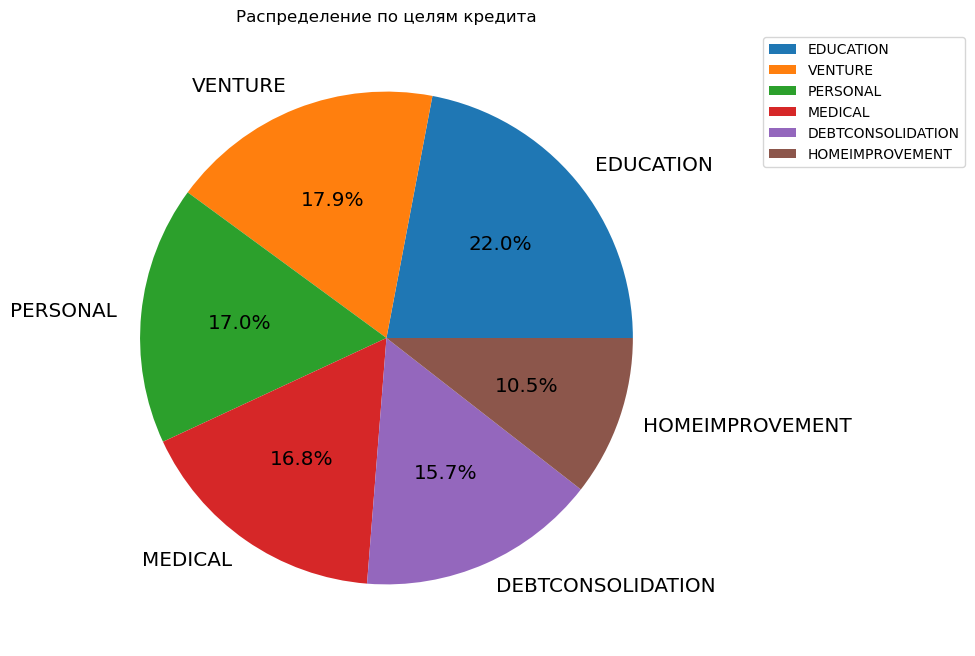

In [808]:
task3 = df.Intent.value_counts()
f, ax = plt.subplots(figsize = (26,8))
plt.pie(task3, autopct='%1.1f%%', labels=task3.index, textprops={'size':'x-large'})
plt.legend(bbox_to_anchor = (1.1,1))
ax.set_title('Распределение по целям кредита')
plt.show()

Была построена круговая диаграмма, из которой видно, что чаще всего целей кредита является образование.

## Вывод
В результате выполнения лабораторной работы была проведена предобработка данных, а также, изучен функционал таких библиотек по визуализации данных, как matplotlib (pyplot), seaborn и встроенные возможности библиотеки pandas. Были изучены такие виды диаграмм, как: диаграмма рассеяния, столбчатая диаграмма, круговая диаграмма. Также были изучены такие понятия, как корреляция и ковариация, построены матрицы корреляций и ковариаций, и, по ним, тепловые карты.